In [168]:

from matplotlib import pyplot as plt
import numpy as np
import random
import csv

# # https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
"""This notebook describes the Breast Cancer dataset and translates them into meaningful
charts created through training data. 

Pavle Janev"""

'This notebook describes the Breast Cancer dataset and translates them into meaningful\ncharts created through training data. \n\nPavle Janev'

In [180]:
 ## Preps program for data parsing by retrieving the headers and data from dataR2.csv
  
with open ('dataR2.csv','r') as file:
    csvReader = csv.reader(file)
    headers = next(csvReader) 
    data = [row for row in csvReader]

In [181]:
## Declaring arrays and parsing through the rows of data.
label = []
dataset = []
for row in data:
    label.append(row[-1])
    dataset.append(row[:-1])


label = np.array(label).astype(int)
dataset = np.array(dataset)
headers = np.array(headers)
headers = headers[:-1]

In [182]:
## Creates random index for training purposes
index = []
indexSize = int(len(dataset) * 0.75)
count = 0 

while count != indexSize:
    i = random.randint(0, len(dataset)-1)
    if i not in index:
        index.append(i)
        count += 1
print('Requested index has length of %s' % len(index))

Requested index has length of 87


In [183]:
## Training and Testing sets 
training_data = np.array([dataset[i] for i in index]).astype(float)
training_label = np.array([label[i] for i in index]).astype(float)

testing_data = np.array(np.array([dataset[i] for i in range(len(dataset)) if i not in index])).astype(float)
testing_label = np.array(np.array([label[i] for i in range(len(label)) if i not in index])).astype(float)

In [184]:
## Posting Vital Metrics for Plot Visualization from Test and Training Data. 

print('Training Data')
print('--------------------------------------------------------------')
for columnnumber,column in enumerate(headers):
     print('%s: Max: %s ,  Min: %s , Mean: %s , Median: %s' % (column, training_data[:,columnnumber].max(), training_data[:, columnnumber].min(), training_data[:, columnnumber].mean(), np.median(training_data[:, columnnumber])))

print('\n\n\n')

print('Test Data')
print('--------------------------------------------------------------')
for columnnumber,column in enumerate(headers):
    print('%s: Max: %s ,  Min: %s , Mean: %s , Median: %s' % (column, testing_data[:,columnnumber].max(), testing_data[:, columnnumber].min(), testing_data[:, columnnumber].mean(), np.median(testing_data[:, columnnumber])))

Training Data
--------------------------------------------------------------
Age: Max: 89.0 ,  Min: 25.0 , Mean: 56.62068965517241 , Median: 54.0
BMI: Max: 38.57875854 ,  Min: 19.13265306 , Mean: 27.741680639885058 , Median: 27.68877813
Glucose: Max: 201.0 ,  Min: 60.0 , Mean: 96.89655172413794 , Median: 92.0
Insulin: Max: 41.611 ,  Min: 2.432 , Mean: 8.67680459770115 , Median: 5.782
HOMA: Max: 20.6307338 ,  Min: 0.467408667 , Mean: 2.236358900390804 , Median: 1.37788
Leptin: Max: 90.28 ,  Min: 4.311 , Mean: 27.051089655172422 , Median: 19.0826
Adiponectin: Max: 38.04 ,  Min: 1.65602 , Mean: 9.569612816091952 , Median: 8.13
Resistin: Max: 82.1 ,  Min: 3.29175 , Mean: 14.877750919540228 , Median: 10.34455
MCP.1: Max: 1698.44 ,  Min: 45.843 , Mean: 536.9208850574712 , Median: 407.206




Test Data
--------------------------------------------------------------
Age: Max: 85.0 ,  Min: 24.0 , Mean: 59.3448275862069 , Median: 61.0
BMI: Max: 36.21227888 ,  Min: 18.37 , Mean: 27.10340139 , Medi

Text(0, 0.5, 'BMI')

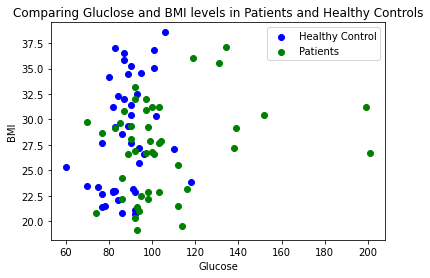

In [185]:
## Comparing Glucose and Bmi levels to determine a trend

plt.figure(1)
bmi = np.array(training_data)[:, headers == 'BMI'].astype(float)
glucose = np.array(training_data)[:, headers =='Glucose'].astype(float)
bmi_training_1 = bmi[training_label == 1]
bmi_training_2 = bmi[training_label == 2]
glucose_training_1 = glucose[training_label == 1]
glucose_training_2 = glucose[training_label == 2]

plotA = plt.scatter(glucose_training_1,bmi_training_1, color ='blue')
plotB = plt.scatter(glucose_training_2,bmi_training_2,color = 'green')
plt.legend((plotA,plotB),('Healthy Control','Patients'))
plt.title('Comparing Gluclose and BMI levels in Patients and Healthy Controls')
plt.xlabel('Glucose')
plt.ylabel('BMI')

Text(0, 0.5, 'BMI')

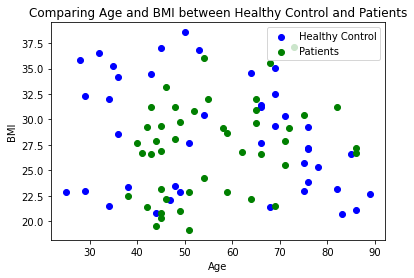

In [186]:

## Comparing Age and BMI between the Healthy Control Group and Patients 

plt.figure(2)
age = np.array(training_data)[:, headers == 'Age'].astype(float)
age_training_1 = age[training_label == 1]
age_training_2 = age[training_label == 2]

plotA = plt.scatter(age_training_1,bmi_training_1, color ='blue')
plotB = plt.scatter(age_training_2,bmi_training_2,color = 'green')
plt.legend((plotA,plotB),('Healthy Control','Patients'))
plt.title('Comparing Age and BMI between Healthy Control and Patients')
plt.xlabel('Age')
plt.ylabel('BMI')



Text(0, 0.5, 'BMI')

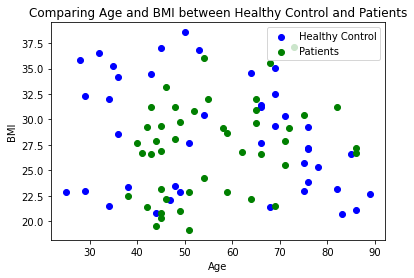

In [187]:
## Comparing Age and BMI between the Healthy Control Group and Patients 

plt.figure(2)
age = np.array(training_data)[:, headers == 'Age'].astype(float)
age_training_1 = age[training_label == 1]
age_training_2 = age[training_label == 2]

plotA = plt.scatter(age_training_1,bmi_training_1, color ='blue')
plotB = plt.scatter(age_training_2,bmi_training_2,color = 'green')
plt.legend((plotA,plotB),('Healthy Control','Patients'))
plt.title('Comparing Age and BMI between Healthy Control and Patients')
plt.xlabel('Age')
plt.ylabel('BMI')

Text(0, 0.5, 'Glucose')

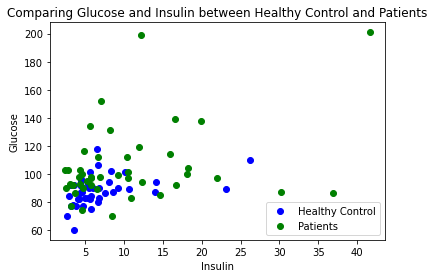

In [188]:
## Comparing Glucose and Insulin Levels between the Healthy Control Group and Patients

plt.figure(3)
insulin = np.array(training_data)[:, headers ==  'Insulin'].astype(float)
insulin_training_1 = insulin[training_label == 1]
insulin_training_2 = insulin[training_label == 2]
plotA = plt.scatter(insulin_training_1,glucose_training_1, color ='blue')
plotB = plt.scatter(insulin_training_2,glucose_training_2,color = 'green')
plt.legend((plotA,plotB),('Healthy Control','Patients'))
plt.title('Comparing Glucose and Insulin between Healthy Control and Patients')
plt.xlabel('Insulin')
plt.ylabel('Glucose')

In [ ]:
## Creating a population frequency between patients and a healthy control.
unique, counts = np.unique(training_label,return_counts=True)
counts = list(counts)
labels = ['Healthy Control', 'Patients']
plt.bar(labels,counts)
plt.xlabel('')
plt.ylabel('Population')
plt.title('Population Frequency of Patients and the Healthy Control')